<a href="https://colab.research.google.com/github/Hamza-Khan993/Image-Classification-Using-Neural-Networks/blob/master/Image_Classification_with_Logistic_Regression_Using_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset = MNIST(root='data', download=True)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root="data", train=False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F6C92D822B0>, 5)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

Label 5


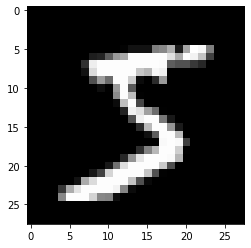

In [7]:
image, label = dataset[0]
plt.imshow(image, cmap ='gray')
print("Label", label)

Label 3


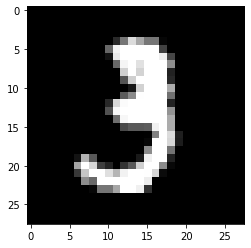

In [8]:
image, label = dataset[10]
plt.imshow(image, cmap ='gray')
print("Label", label)

In [9]:
from torchvision.transforms import transforms

In [10]:
data = MNIST(root= "data", train =True, transform = transforms.ToTensor())

In [11]:
img_tensor, label = data[0]
print(img_tensor.shape)
print(label)

torch.Size([1, 28, 28])
5


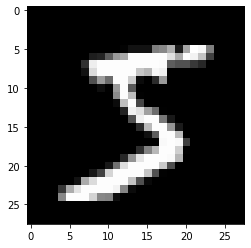

In [12]:
plt.imshow(img_tensor[0,:,:], cmap="gray")


In [13]:
import numpy as np

Creating function to split data into training and validation indices

In [14]:
def slicing_index (n, val_pct):
  val = int(n*val_pct)
  indxs = np.random.permutation(n)
  return indxs[val:], indxs[:val]

In [15]:
train_indices , val_indices = slicing_index(n=len(data), val_pct = 0.2)
train_indices[20:]

array([ 7183, 52680, 36888, ..., 48333, 58304, 56732])

In [16]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [17]:
batch_size = 100

train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(data, 
                          batch_size, 
                          sampler=train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(data, 
                        batch_size, 
                        sampler=val_sampler)

In [18]:
import torch.nn as nn
input_size = 784
num_classes = 10

# model = nn.Linear(input_size, num_classes)

In [19]:
print(model.parameters())

<generator object Module.parameters at 0x7f6c9290d410>


In [30]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes )

  def forward(self, xb):
    xb = xb.reshape(-1,784)
    out = self.linear(xb)
    return out
model = MnistModel()

In [32]:
for images, labels in train_loader:
  outputs = model(images)
  print(labels)
  print(images.shape)  
  break
  
print(outputs.shape)
print(outputs[:2].data)

tensor([1, 9, 4, 8, 2, 5, 1, 8, 2, 1, 3, 8, 7, 3, 7, 5, 6, 8, 9, 3, 3, 9, 6, 2,
        3, 1, 1, 5, 5, 9, 6, 4, 2, 2, 3, 9, 8, 7, 5, 3, 8, 5, 9, 9, 1, 7, 0, 0,
        1, 9, 1, 5, 0, 8, 4, 6, 3, 6, 1, 5, 5, 0, 6, 8, 1, 8, 2, 0, 8, 6, 8, 0,
        3, 7, 3, 0, 6, 7, 9, 2, 8, 6, 9, 6, 2, 2, 6, 3, 0, 1, 3, 3, 0, 8, 5, 1,
        5, 2, 1, 9])
torch.Size([100, 1, 28, 28])
torch.Size([100, 10])
tensor([[ 0.0479, -0.0279,  0.0156, -0.0995,  0.0022,  0.2786,  0.0874, -0.1795,
         -0.1391, -0.1283],
        [-0.1511, -0.1532, -0.1314,  0.1037,  0.1524,  0.3110, -0.1732, -0.0856,
         -0.2695,  0.0434]])


SoftMax

In [33]:
import torch.nn.functional as F

In [35]:
probs = F.softmax(outputs, dim=1)
print("Sample Probabilities: \n", probs[:2].data)
print("Sum: ",  torch.sum(probs[0]).item())

Sample Probabilities: 
 tensor([[0.1055, 0.0978, 0.1022, 0.0911, 0.1008, 0.1329, 0.1098, 0.0840, 0.0875,
         0.0885],
        [0.0877, 0.0875, 0.0895, 0.1132, 0.1188, 0.1393, 0.0858, 0.0937, 0.0779,
         0.1066]])
Sum:  1.0


In [36]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([5, 5, 9, 4, 6, 1, 0, 4, 6, 4, 3, 5, 9, 3, 5, 5, 6, 5, 5, 9, 5, 9, 4, 5,
        5, 2, 0, 4, 2, 4, 9, 5, 4, 4, 9, 4, 5, 4, 5, 5, 4, 1, 5, 5, 4, 4, 2, 0,
        6, 4, 5, 9, 9, 5, 9, 4, 5, 9, 9, 2, 7, 9, 9, 6, 2, 4, 6, 3, 4, 9, 4, 9,
        5, 4, 9, 1, 4, 5, 5, 4, 6, 9, 6, 3, 5, 9, 9, 3, 3, 2, 3, 3, 5, 1, 0, 2,
        4, 5, 5, 4])
tensor([0.1329, 0.1393, 0.1270, 0.1135, 0.1216, 0.1215, 0.1232, 0.1282, 0.1411,
        0.1207, 0.1420, 0.1436, 0.1355, 0.1324, 0.1129, 0.1251, 0.1194, 0.1176,
        0.1323, 0.1268, 0.1372, 0.1415, 0.1245, 0.1199, 0.1337, 0.1232, 0.1247,
        0.1190, 0.1358, 0.1222, 0.1314, 0.1382, 0.1242, 0.1216, 0.1141, 0.1210,
        0.1307, 0.1393, 0.1171, 0.1395, 0.1286, 0.1328, 0.1462, 0.1329, 0.1137,
        0.1108, 0.1409, 0.1170, 0.1166, 0.1304, 0.1198, 0.1291, 0.1257, 0.1303,
        0.1382, 0.1217, 0.1438, 0.1239, 0.1144, 0.1207, 0.1157, 0.1465, 0.1233,
        0.1201, 0.1268, 0.1385, 0.1183, 0.1392, 0.1730, 0.1268, 0.1458, 0.1523,
        0.1373, 0.1

In [37]:
labels

tensor([1, 9, 4, 8, 2, 5, 1, 8, 2, 1, 3, 8, 7, 3, 7, 5, 6, 8, 9, 3, 3, 9, 6, 2,
        3, 1, 1, 5, 5, 9, 6, 4, 2, 2, 3, 9, 8, 7, 5, 3, 8, 5, 9, 9, 1, 7, 0, 0,
        1, 9, 1, 5, 0, 8, 4, 6, 3, 6, 1, 5, 5, 0, 6, 8, 1, 8, 2, 0, 8, 6, 8, 0,
        3, 7, 3, 0, 6, 7, 9, 2, 8, 6, 9, 6, 2, 2, 6, 3, 0, 1, 3, 3, 0, 8, 5, 1,
        5, 2, 1, 9])

**Metric and Loss Function**

In [38]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [39]:
accuracy(outputs, labels)

tensor(0.1000)

In [40]:
loss_fn = F.cross_entropy

In [41]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3143, grad_fn=<NllLossBackward>)


In [42]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [43]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [44]:
result0 = evaluate(model, val_loader)
result0

{'val_acc': 0.18174998462200165, 'val_loss': 2.2803633213043213}

In [45]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.8521, val_acc: 0.6770
Epoch [1], val_loss: 1.5623, val_acc: 0.7453
Epoch [2], val_loss: 1.3583, val_acc: 0.7755
Epoch [3], val_loss: 1.2113, val_acc: 0.7959
Epoch [4], val_loss: 1.1016, val_acc: 0.8076


In [46]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.0174, val_acc: 0.8167
Epoch [1], val_loss: 0.9510, val_acc: 0.8233
Epoch [2], val_loss: 0.8972, val_acc: 0.8288
Epoch [3], val_loss: 0.8528, val_acc: 0.8330
Epoch [4], val_loss: 0.8154, val_acc: 0.8353


In [47]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7836, val_acc: 0.8397
Epoch [1], val_loss: 0.7561, val_acc: 0.8429
Epoch [2], val_loss: 0.7321, val_acc: 0.8442
Epoch [3], val_loss: 0.7110, val_acc: 0.8462
Epoch [4], val_loss: 0.6921, val_acc: 0.8483


In [48]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.6753, val_acc: 0.8500
Epoch [1], val_loss: 0.6600, val_acc: 0.8517
Epoch [2], val_loss: 0.6463, val_acc: 0.8532
Epoch [3], val_loss: 0.6337, val_acc: 0.8547
Epoch [4], val_loss: 0.6222, val_acc: 0.8564


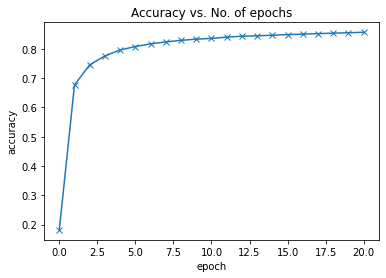

In [49]:
# Replace these values with your results
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

**Testing On Individual Images**

In [50]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


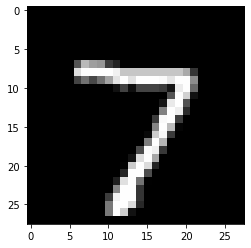

In [51]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [52]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [54]:
# Let's define a helper function predict_image, which returns the predicted label for a single image tensor.

def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


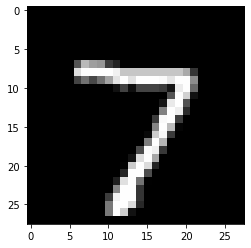

In [55]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


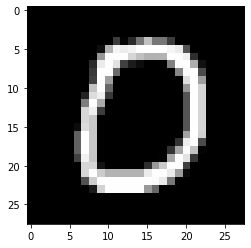

In [56]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 4


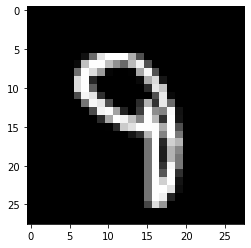

In [57]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


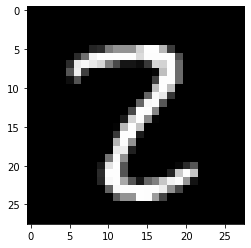

In [58]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [59]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_acc': 0.86767578125, 'val_loss': 0.5917910933494568}

In [60]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [61]:
model.state_dict()


OrderedDict([('linear.weight',
              tensor([[ 0.0240, -0.0319,  0.0279,  ...,  0.0155, -0.0176, -0.0297],
                      [-0.0139, -0.0238, -0.0336,  ...,  0.0319,  0.0342, -0.0093],
                      [ 0.0129, -0.0100,  0.0120,  ...,  0.0158, -0.0251,  0.0145],
                      ...,
                      [ 0.0336,  0.0222,  0.0246,  ..., -0.0322, -0.0342,  0.0128],
                      [ 0.0114, -0.0132,  0.0028,  ..., -0.0284, -0.0220,  0.0036],
                      [ 0.0005, -0.0203,  0.0096,  ..., -0.0047,  0.0009,  0.0247]])),
             ('linear.bias',
              tensor([-0.0471,  0.1178, -0.0129, -0.0601,  0.0237,  0.0329,  0.0023,  0.0279,
                      -0.0846, -0.0344]))])

In [62]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0240, -0.0319,  0.0279,  ...,  0.0155, -0.0176, -0.0297],
                      [-0.0139, -0.0238, -0.0336,  ...,  0.0319,  0.0342, -0.0093],
                      [ 0.0129, -0.0100,  0.0120,  ...,  0.0158, -0.0251,  0.0145],
                      ...,
                      [ 0.0336,  0.0222,  0.0246,  ..., -0.0322, -0.0342,  0.0128],
                      [ 0.0114, -0.0132,  0.0028,  ..., -0.0284, -0.0220,  0.0036],
                      [ 0.0005, -0.0203,  0.0096,  ..., -0.0047,  0.0009,  0.0247]])),
             ('linear.bias',
              tensor([-0.0471,  0.1178, -0.0129, -0.0601,  0.0237,  0.0329,  0.0023,  0.0279,
                      -0.0846, -0.0344]))])

In [63]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_acc': 0.86767578125, 'val_loss': 0.5917910933494568}